## Strassen homework

#### Exercise 1/2

The generalized version of the strassen multiplication algorithm to non rectangular matrices can be found in the matrix.py file, here I will analize the effect on the execution time

The time complexity for multipling two square matrices with size power of two is $T(n) = \Theta(n^{\log_2(7)})$  
This also holds for matrices of uneven size because I can pad the matrices with zeros until I reach the next power of two and make use of the identity
$$\begin{pmatrix}
A & 0 \\
0 & 0 
\end{pmatrix}
\begin{pmatrix}
B & 0 \\
0 & 0 
\end{pmatrix}
= 
\begin{pmatrix}
AB & 0 \\
0 & 0 
\end{pmatrix}$$

The time complexity of this algorithm will be:
$$T(n) \leq T(a \cdot n) = \Theta((a \cdot n)^{\log_2(7)}) = \Theta(a^{\log_2(7)} \cdot n^{\log_2(7)}) = \Theta(n^{\log_2(7)})$$
Where $a<2$  

In the matrix.py file I don't scale up the matrices to the next power of two but I add a column or row in case the matrix is odd, this case performs less operations than the one discussed above so the implementation remains $\Theta(n^{\log_2(7)})$

For two rectangular matrices of sizes $m$ x $n$ and $n$ x $o$ with $m$, $n$, $o$ power two the execution time is:
$$
T(n, m, o)=
\begin{cases}
5/4 \,(m n + o n) + 7 \cdot T(n/2, m/2, o/2) \quad \max(n, m, o) \geq 64\\
\alpha \quad \max(n, m, o) < 64
\end{cases}
$$
The problem with this recursion is that we don't know $\max(n, m, o)$ which is related to the upper bound of the summation, so we define $M = \max(n, m, o)$  

$$T(n, m, o) = \frac{5}{4}\alpha \sum_{i=0}^{\log_2 M} (7/4)^i n\cdot(m+o) = \frac{5}{4}n\cdot(m+o) \frac{(7/4)^{\log_2(M)+1} - 1}{7/4 - 1} =
\Theta(n\cdot(m+o)(7/4)^{\log_2 M}) = \Theta(n\cdot(m+o)M^{\log_2(7/4)})$$
If we suppose that $n$ is the maximum among the three indices we get
$$T(n, m, o) = \Theta((m+o)n^{\log_2(7) - 1})$$
From this formula is clear that if $n = m = o$ we get the usual strassen matrix multiplication complexity

We can generalize this formula to non-power-of-two matrices like we did before: Usinf the above matrix identity and by padding the matrices
$$T(n, m, o) \leq T(a n, b m, c o) = \Theta(an\cdot(bm+co)\cdot \max(a,b,c)M^{\log_2(7/4)}) = \Theta(n\cdot(m+o)M^{\log_2(7/4)})$$
Where $a, b, c<2$  



In [1]:
from matrix import *
from random import random as rand

n = 128
A = Matrix([[rand() for j in range(n)] for i in range(n)], clone_matrix=False)
B = Matrix([[rand() for j in range(n)] for i in range(n)], clone_matrix=False)

gauss_matrix_mult(A, B) - better_strassen_matrix_mult(A, B)

[3.552713678800501e-14, -2.1316282072803006e-14, 2.1316282072803006e-14, 2.1316282072803006e-14, 7.105427357601002e-15, -1.4210854715202004e-14, -3.552713678800501e-15, -5.684341886080802e-14, -7.105427357601002e-15, 1.4210854715202004e-14, -2.1316282072803006e-14, 4.263256414560601e-14, -1.4210854715202004e-14, 0.0, 0.0, 7.105427357601002e-15, 3.197442310920451e-14, -1.0658141036401503e-14, -7.105427357601002e-15, -1.4210854715202004e-14, -5.684341886080802e-14, 2.1316282072803006e-14, 1.4210854715202004e-14, 1.4210854715202004e-14, -1.7763568394002505e-14, -2.842170943040401e-14, -2.842170943040401e-14, 7.105427357601002e-15, 2.842170943040401e-14, -2.1316282072803006e-14, 0.0, -1.4210854715202004e-14, 0.0, -1.4210854715202004e-14, -1.4210854715202004e-14, 0.0, -3.552713678800501e-14, -7.105427357601002e-15, -1.4210854715202004e-14, 2.1316282072803006e-14, 7.105427357601002e-15, -7.105427357601002e-15, 3.552713678800501e-15, -7.105427357601002e-15, -1.0658141036401503e-14, 7.10542735

done: 2
done: 4
done: 8
done: 16
done: 32
done: 64
done: 128
done: 256
done: 512
done: 1024


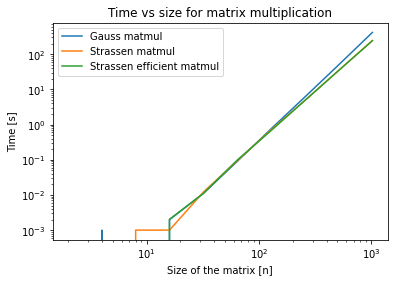

In [3]:
# Exercise 3:
from matrix import *
from random import random
import time
from IPython.display import clear_output
import pylab as pl

# Sizes to consider
all_n = [2**i for i in range(1, 11)]
time_gauss = []
time_strassen_naive = []
time_strassen_better = []

f = open("matrix-times.txt", "w")
f.write("# Gauss_matmul/strassen_matmul/memory_efficient_strassen_matmul")
for n in all_n:
    # Generates two uniform random matrix
    A = Matrix([[random() for j in range(n)] for i in range(n)], clone_matrix=False)
    B = Matrix([[random() for j in range(n)] for i in range(n)], clone_matrix=False)

    # Time of the gauss matmul
    start = time.time()
    gauss_matrix_mult(A, B)
    time_gauss.append(time.time() - start)
    f.write(f"{time_gauss[-1]} ")

    # Time of the naive strassen matmul
    start = time.time()
    strassen_matrix_mult(A, B)
    time_strassen_naive.append(time.time() - start)
    f.write(f"{time_strassen_naive[-1]} ")

    # Time of the better strassen matmul
    start = time.time()
    better_strassen_matrix_mult(A, B)
    time_strassen_better.append(time.time() - start)
    f.write(f"{time_strassen_better[-1]}\n")

    # To track progress
    print("done:", n)

f.close()

# Plot the curves
pl.loglog(all_n, time_gauss, label="Gauss matmul")
pl.loglog(all_n, time_strassen_naive, label="Strassen matmul")
pl.loglog(all_n, time_strassen_better, label="Strassen efficient matmul")
pl.legend()
pl.ylabel("Time [s]")
pl.xlabel("Size of the matrix [n]")
pl.title("Time vs size for matrix multiplication")
pl.savefig("Time-comparison.png", dpi=300)

#### Exercise 4

With the new implementation of the strassen algorithm (better_strassen_matrix_mult in module matrix.py) we reduced by a lot the number of extra memory space needed, for a single iteration we only need two submatrices storing the sums and one matrix storing the product, along with the full matrix which contains the final result. 